# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [1]:
! git clone https://github.com/ds4e/linearModels

Cloning into 'linearModels'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 43 (delta 9), reused 5 (delta 5), pack-reused 27 (from 1)
Receiving objects: 100% (43/43), 3.60 MiB | 5.75 MiB/s, done.
Resolving deltas: 100% (9/9), done.


   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  
Unnamed: 0           0
Make     

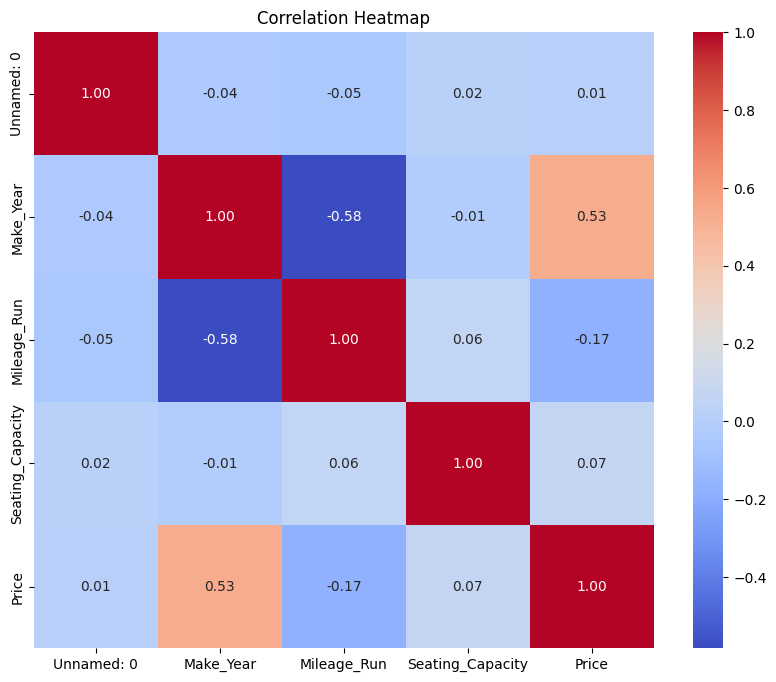

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/linearModels/lab/data/cars_hw.csv')

# Inspect the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Handle missing values (for simplicity, we drop rows with missing values)
df = df.dropna()

# Check the data types
print(df.dtypes)

# Display descriptive statistics for numerical variables
print(df.describe())

# --- One-Hot Encoding for Categorical Columns ---
# Identify categorical columns
categorical_columns = ['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']

# Perform One-Hot Encoding (creates binary columns for each category)
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Check the transformed dataframe
print(df.head())

# --- Correlation Heatmap for Numeric Columns Only ---
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Additional EDA: Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# Transform categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Check the transformed dataframe
print(df.head())

   Unnamed: 0  Make_Year  Mileage_Run  Seating_Capacity   Price  Make_Datsun  \
0           1       2017        44611                 5  657000        False   
1           2       2016        20305                 5  682000        False   
2           3       2019        29540                 5  793000        False   
3           4       2017        35680                 5  414000        False   
4           5       2017        25126                 5  515000        False   

   Make_Ford  Make_Honda  Make_Hyundai  Make_Jeep  ...  Body_Type_suv  \
0      False       False         False      False  ...          False   
1      False       False          True      False  ...          False   
2      False        True         False      False  ...           True   
3      False       False         False      False  ...          False   
4      False       False          True      False  ...          False   

   Fuel_Type_petrol  Fuel_Type_petrol+cng  Transmission_5-Speed  \
0            

In [10]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training data size: {X_train.shape[0]}')
print(f'Test data size: {X_test.shape[0]}')

Training data size: 780
Test data size: 196


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on both training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate RMSE and R-squared for training and test data
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Training R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant to the features for statsmodels
X_train_const = sm.add_constant(X_train)

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X_train_const.columns
vif['VIF'] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]

print(vif)

Training RMSE: 141148.29204256524
Test RMSE: 145117.5942619901
Training R-squared: 0.8572664053124002
Test R-squared: 0.8163910583949037


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [13]:
from sklearn.preprocessing import PolynomialFeatures

# Apply PolynomialFeatures to capture non-linearity (e.g., quadratic terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a new model with polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predict and evaluate the new model
y_train_poly_pred = model_poly.predict(X_train_poly)
y_test_poly_pred = model_poly.predict(X_test_poly)

train_poly_rmse = np.sqrt(mean_squared_error(y_train, y_train_poly_pred))
test_poly_rmse = np.sqrt(mean_squared_error(y_test, y_test_poly_pred))

train_poly_r2 = r2_score(y_train, y_train_poly_pred)
test_poly_r2 = r2_score(y_test, y_test_poly_pred)

print(f'Polynomial Model - Training RMSE: {train_poly_rmse}')
print(f'Polynomial Model - Test RMSE: {test_poly_rmse}')
print(f'Polynomial Model - Training R-squared: {train_poly_r2}')
print(f'Polynomial Model - Test R-squared: {test_poly_r2}')

Polynomial Model - Training RMSE: 74781.46297013156
Polynomial Model - Test RMSE: 2359102.797810429
Polynomial Model - Training R-squared: 0.9599352107134312
Polynomial Model - Test R-squared: -47.52297479540267


In [14]:
from sklearn.linear_model import Lasso

# Initialize the Lasso model
lasso = Lasso(alpha=0.1)

# Fit the model
lasso.fit(X_train, y_train)

# Predict and evaluate the Lasso model
y_train_lasso_pred = lasso.predict(X_train)
y_test_lasso_pred = lasso.predict(X_test)

train_lasso_rmse = np.sqrt(mean_squared_error(y_train, y_train_lasso_pred))
test_lasso_rmse = np.sqrt(mean_squared_error(y_test, y_test_lasso_pred))

train_lasso_r2 = r2_score(y_train, y_train_lasso_pred)
test_lasso_r2 = r2_score(y_test, y_test_lasso_pred)

print(f'Lasso Model - Training RMSE: {train_lasso_rmse}')
print(f'Lasso Model - Test RMSE: {test_lasso_rmse}')
print(f'Lasso Model - Training R-squared: {train_lasso_r2}')
print(f'Lasso Model - Test R-squared: {test_lasso_r2}')

# Get the features selected by Lasso
selected_features = X.columns[lasso.coef_ != 0]
print(f'Selected features by Lasso: {selected_features}')

Lasso Model - Training RMSE: 141148.29442510798
Lasso Model - Test RMSE: 145117.69235875492
Lasso Model - Training R-squared: 0.8572664004937958
Lasso Model - Test R-squared: 0.8163908101624362
Selected features by Lasso: Index(['Unnamed: 0', 'Make_Year', 'Mileage_Run', 'Seating_Capacity',
       'Make_Datsun', 'Make_Ford', 'Make_Honda', 'Make_Hyundai', 'Make_Jeep',
       'Make_Kia', 'Make_MG Motors', 'Make_Mahindra', 'Make_Maruti Suzuki',
       'Make_Nissan', 'Make_Renault', 'Make_Skoda', 'Make_Tata', 'Make_Toyota',
       'Make_Volkswagen', 'Color_black', 'Color_blue', 'Color_bronze',
       'Color_brown', 'Color_golden', 'Color_green', 'Color_grey',
       'Color_maroon', 'Color_orange', 'Color_purple', 'Color_red',
       'Color_silver', 'Color_white', 'Color_yellow', 'Body_Type_hatchback',
       'Body_Type_muv', 'Body_Type_sedan', 'Body_Type_suv', 'Fuel_Type_petrol',
       'Fuel_Type_petrol+cng', 'Transmission_5-Speed', 'Transmission_6-Speed',
       'Transmission_7-Speed', 'T

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.026e+12, tolerance: 1.089e+10
  model = cd_fast.enet_coordinate_descent(


Summarize the performance of the models:

Simple linear regression: Shows basic prediction accuracy.

Polynomial regression: Can improve model performance if non-linear relationships are present.

Lasso regression: Helps to reduce the complexity of the model by regularizing it and selecting the most relevant features.



Ack: I used ChatGPT to help me with this assignment